## Comparison of 30-day Volatility of ETH-USDC versus ETH-BTC

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 30, 10

In [2]:
def resample_and_add_cols(df):
    df = df[df.index > '2019']
    df = df[['open']].resample('D').mean()
    df['returns'] = df['open'].pct_change()
    df['variance'] = df['returns'] ** 2
    df['variance30'] = df['variance'].rolling(30).sum() / 30
    df['std30'] = df['variance30'].apply(np.sqrt)
    return df

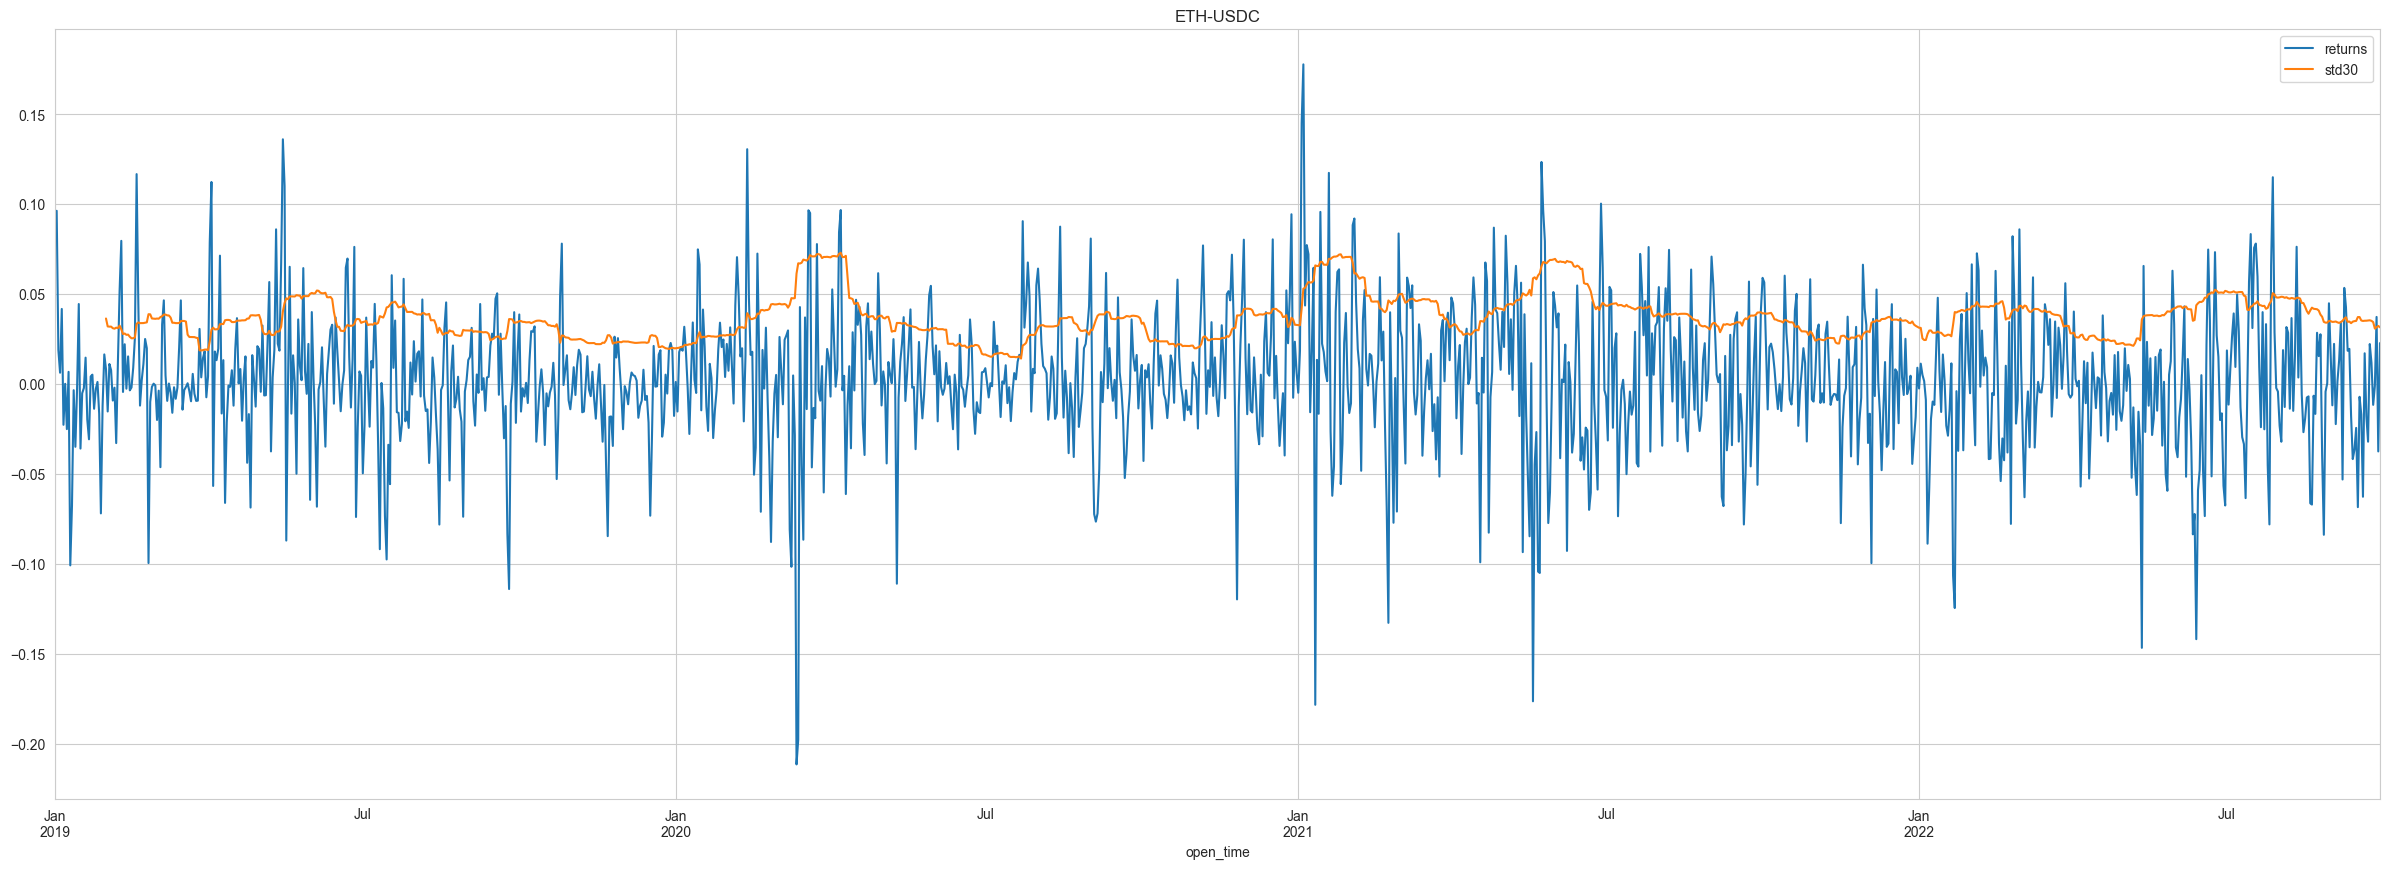

count    1338.000000
mean        0.036699
std         0.011825
min         0.014072
25%         0.027953
50%         0.035340
75%         0.042354
max         0.072912
Name: std30, dtype: float64


In [3]:
df_ethusdc = pd.read_parquet("ETH-USDC.parquet")
df_ethusdc = resample_and_add_cols(df_ethusdc)
df_ethusdc[['returns', 'std30']].plot(title='ETH-USDC')
plt.show()

print(df_ethusdc['std30'].describe())

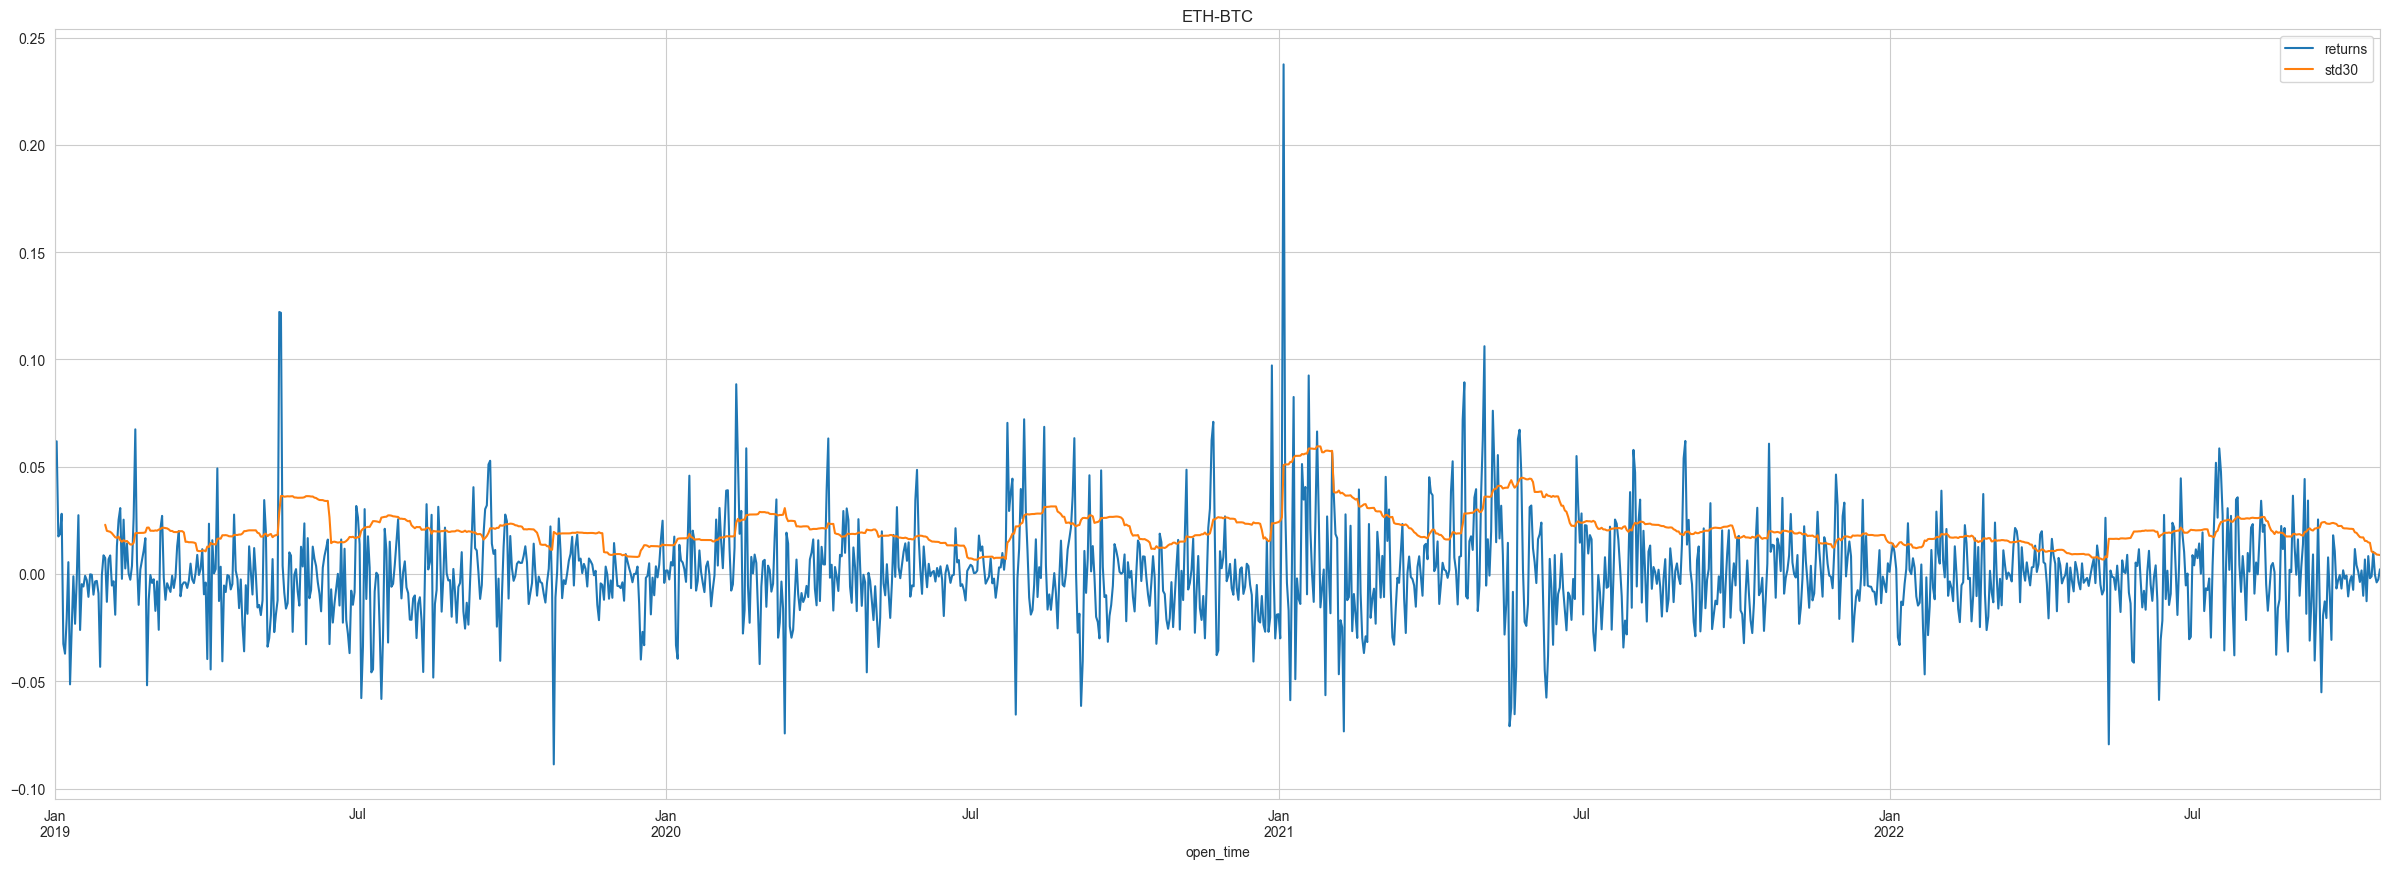

count    1360.000000
mean        0.021163
std         0.008598
min         0.006630
25%         0.016552
50%         0.019480
75%         0.023906
max         0.059497
Name: std30, dtype: float64


In [4]:
df_ethbtc = pd.read_parquet("ETH-BTC.parquet")
df_ethbtc = resample_and_add_cols(df_ethbtc)
df_ethbtc[['returns', 'std30']].plot(title='ETH-BTC')
plt.show()

print(df_ethbtc['std30'].describe())